In [86]:
# The cells in this notebook run each step in the HydroFlow workflow
# This workflow was developed to function from within the designated SnowModel
# folder for each domain.

# Import all of the python packages used in this workflow.
import scipy
import numpy as np
import pandas as pd
import numpy as np
import xarray as xr
import geopandas as gpd
from datetime import date, datetime
from datetime import timedelta  
import json
from xgrads import open_CtlDataset
import os
import glob
import requests
import matplotlib.pyplot as plt


# Choose a domain
domain = 'BEAU'

# Path to the SnowModel folder
SMpath = '/nfs/attic/dfh/2020_NPRB/domain_'+domain+'/snowmodel2023_cfsv2/'
#SMpath = '/scratch/Nina/NPRB/domain_'+domain+'/snowmodel2023_cfsv2/'

# results figures path
figpath = '/nfs/attic/dfh/2020_NPRB/data/results/figures/'


#path to NPRB domains
domains_resp = requests.get("https://raw.githubusercontent.com/NPRB/02_preprocess_python/main/NPRB_domains.json")
domains = domains_resp.json()
    
# Define nx and ny for this domain to be used later
nx = domains[domain]['ncols']
ny = domains[domain]['nrows']
clsz = domains[domain]['cellsize']
xll = domains[domain]['xll']
yll = domains[domain]['yll']

states = gpd.read_file('/nfs/attic/dfh/Aragon2/Notebooks/snow_storage/shapefiles/cb_2018_us_state_500k/cb_2018_us_state_500k.shp')
statesproj = states.to_crs(domains[domain]['mod_proj'])

#yukon shapefile
path = '/nfs/attic/dfh/2020_NPRB/data/gis/YUKO/yuko_final.shp'
yuko = gpd.read_file(path)
yukoproj= yuko.to_crs(domains[domain]['mod_proj'])

#huc4 shapefile
path = '/nfs/attic/dfh/2020_NPRB/data/gis/ak_huc4/ak_huc4.shp'
huc4 = gpd.read_file(path)
huc4proj = huc4.to_crs(domains[domain]['mod_proj'])
brisproj = huc4proj.loc[huc4proj.huc4=='1903']
beauproj = huc4proj.loc[huc4proj.huc4=='1906']
chukproj = huc4proj.loc[huc4proj.huc4=='1905']

In [74]:
beauproj['coords']

4    (163051.84365279178, 2179826.583873433)
Name: coords, dtype: object

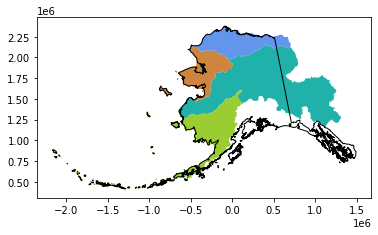

In [81]:
fig, ax = plt.subplots(1, figsize=[6,4])
yukoproj.plot(ax=ax,color='lightseagreen',label= 'YUKO')
chukproj.plot(ax=ax,color='peru',label= 'CHUK')
brisproj.plot(ax=ax,color='yellowgreen',label= 'BRIS')
beauproj.plot(ax=ax,color='cornflowerblue',label= 'BEAU')
statesproj[statesproj.STUSPS=='AK'].boundary.plot(color=None, edgecolor = 'k',ax=ax,linewidth =1)

# beauproj["center"] = beauproj["geometry"].centroid
# points = beauproj.copy()
# points.set_geometry("center", inplace = True)
# points['name']='BEAU'
# texts = []
# for x, y, label in zip(points.geometry.x, points.geometry.y, points.name):
#     texts.append(plt.text(x, y, label, fontsize = 8))
fig.savefig(figpath+'huc4map.png', dpi=300)

In [98]:
# Choose a domain
domain = 'YUKO'

# Path to the SnowModel folder
SMpath = '/nfs/attic/dfh/2020_NPRB/domain_'+domain+'/snowmodel2023_cfsv2/'
# watershed maps 
# path to files
wsd_ctl = SMpath+'/watershed/watershed.ctl'
wsdlistpath = '/nfs/attic/dfh/2020_NPRB/data/hf/'+domain+'/watersheds.csv'

# results path
resultpath = '/nfs/attic/dfh/2020_NPRB/data/results/'+domain+'/'

# open watershed data
wd = open_CtlDataset(wsd_ctl)

# open list of watersheds to include
wsd_list = pd.read_csv(wsdlistpath,index_col=0)
wsdlist=wsd_list.wd.tolist()


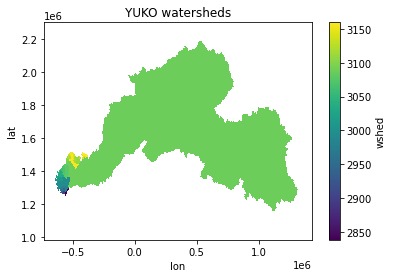

In [99]:
fig, ax = plt.subplots(1, figsize=[6,4])
wd.wshed.where(wd.wshed.isin(wsdlist)).plot(ax=ax)
plt.title(domain+' watersheds')
fig.savefig(figpath+domain+'_watersheds.png', dpi=300)